In [3]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import os
from shutil import copyfile
import glob
import pandas as pd

In [4]:
def create_data_dir(pathData: str, pathDataOrig: str):
    """ Generate dirs for audio and image
        Copy .wav files to corresponding audio folder, divided according to emotion class

    Args:
        pathData (str): _description_
        pathDataOrig (str): _description_
    """

    os.makedirs(pathData, exist_ok=True)
    pathAudio = os.path.join(pathData, 'audio/')
    pathImage = os.path.join(pathData, 'image/')
    os.makedirs(pathAudio, exist_ok=True)
    os.makedirs(pathImage, exist_ok = True)

    emotions=['anger', 'happiness', 'neutral', 'sadness']

    for emotion in emotions:
        pathAudioEmotion=pathAudio + emotion
        pathImageEmotion=pathImage + emotion
        os.makedirs(pathAudioEmotion, exist_ok=True)
        os.makedirs(pathImageEmotion, exist_ok=True)

    for emotion in emotions:
        print('Emotion: ' + emotion)
        emotionFile=pd.read_csv("/kaggle/input/separated-emotion-filenames/"+emotion[0:3]+'.csv')
        emotionFilenames=emotionFile['filenames']
#         print(len(emotionFilenames))
        for filename_target in emotionFilenames:
            for filename in glob.iglob(pathDataOrig + '/**/' + filename_target + '.wav', recursive=True):
                copyfile(filename, os.path.join(
                    pathAudio + emotion, filename_target + '.wav'))

In [5]:
import librosa
import matplotlib.pyplot as plt


def save_spectrogram(audio_fname, image_fname):
    '''
    Compute mel-spectrogram and save resulting image

    '''

    y, sr = librosa.load(audio_fname, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
    plt.axis('off')
    plt.draw()
    fig1.savefig(image_fname, dpi=100)


def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


def get_filename(path):
    absolute_fname_parts = path.split('/')
    fname = absolute_fname_parts[len(absolute_fname_parts) - 1]
    return fname


def audio_to_spectrogram(audio_dir_path, image_dir_path, emotion):
    pathDataOrig = '/kaggle/input/iemocapfullrelease/IEMOCAP_full_release'
    emotionFile=pd.read_csv("/kaggle/input/separated-emotion-filenames/"+emotion[0:3]+'.csv')
    emotionFilenames=emotionFile['filenames']
    
    for filename_target in emotionFilenames:
        for audio_path in glob.iglob(pathDataOrig + '/**/' + filename_target + '.wav', recursive=True):
            audio_filename = get_filename(audio_path)
            image_fname = audio_filename.split('.')[0] + '.png'
            if image_dir_path:
                image_fname = image_dir_path + '/' + image_fname
            try:
                save_spectrogram(audio_path, image_fname)
            except ValueError as verr:
                print('Failed to process %s %s' % (image_fname, verr))

In [ ]:
# pathData = '/kaggle/working/data3'
# pathDataOrig = '/kaggle/input/iemocapfullrelease/IEMOCAP_full_release'
# create_data_dir(pathData,pathDataOrig)

Emotion: sadness
1042
Now considering from:  97


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


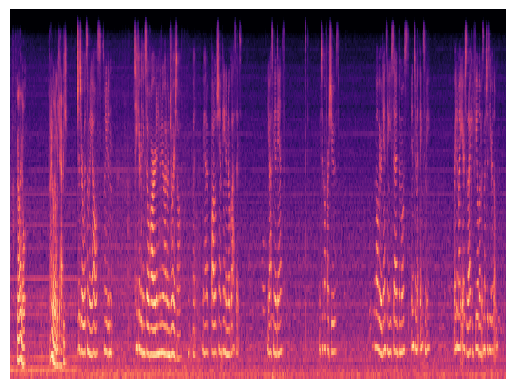

In [6]:
emotions = ['anger','happiness', 'neutral', 'sadness']


for emotion in emotions:
    print('Emotion: ' + emotion)
    pathAudioEmotion = "/kaggle/input/iemocapfullrelease/IEMOCAP_full_release"
    pathImageEmotion = "/kaggle/working/newdata/image/" + emotion
    os.makedirs(pathImageEmotion, exist_ok=True)
    audio_to_spectrogram(pathAudioEmotion, pathImageEmotion, emotion)

In [7]:
!zip -r data.zip /kaggle/working/newdata

  adding: kaggle/working/newdata/ (stored 0%)
  adding: kaggle/working/newdata/image/ (stored 0%)
  adding: kaggle/working/newdata/image/sadness/ (stored 0%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_impro06_M011.png (deflated 3%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_script02_2_F014.png (deflated 2%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_script01_3_M039.png (deflated 3%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_impro02_M018.png (deflated 4%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_script02_2_F019.png (deflated 2%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_impro06_F010.png (deflated 3%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_script01_1b_F028.png (deflated 3%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_script01_3_M023.png (deflated 3%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_script02_2_F012.png (deflated 3%)
  adding: kaggle/working/newdata/image/sadness/Ses05M_scri